In [1]:
from __future__ import division, print_function
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats
import lmfit
import time
import math
from scipy.signal import savgol_filter
from time import sleep

In [2]:
def RisingEdge(signal):
    sig = savgol_filter(signal, 3, 1) # Savitzky-Golay filter smooths signal to get accurate vlaue for max val
    maxval = np.amax(sig)
    minval = np.amin(sig)
    if np.abs(maxval) >= np.abs(minval): # positive signal
        tenval = maxval* 0.01 # using t99- t01
        ninetyval = maxval * 0.99
    
        tenindex = 0
        ninetyindex = 0
        for i in range(0, np.argmax(signal), 1): # picks out last value before t01
            if signal[i] <= tenval:
                tenindex = i
        for i in range(tenindex, len(signal), 1): # picks out first value after t99
             if signal[i] >= ninetyval:
                ninetyindex = i
                break  
                
    elif np.abs(maxval) < np.abs(minval): # negative
        tenval = minval* 0.01 # using t99- t01
        ninetyval = minval * 0.99
        
        tenindex = 0
        ninetyindex = 0
        for i in range(0, np.argmin(signal), 1): # picks out last value before t01
            if signal[i] >= tenval:
                tenindex = i
        for i in range(tenindex, np.argmin(signal) + 5, 1): # picks out first value after t99
             if signal[i] <= ninetyval:
                ninetyindex = i
                break           
    else:
        print('ERROR')
        
    if tenindex == ninetyindex:
        print(tenval)
        print(signal[tenindex])
        print(ninetyval)
        print(signal[ninetyindex])
        plt.plot(signal, 'o')
        plt.plot(tenindex, signal[tenindex], 'dr')
        plt.plot(ninetyindex, signal[ninetyindex], 'sr')
        plt.show()
        print('ERROR2')
        
    signal = signal[tenindex:ninetyindex] # cut out t99-t01 portion and pad the rest with zeros to get it to same length (301 samples)
    length = 301 - len(signal)
    z = np.zeros(length)
    signal = np.concatenate((signal,z))
    return signal

In [3]:
def RisingEdgeTest(signal):
    sig = np.abs(signal)
    sig = savgol_filter(signal, 3, 1) # Savitzky-Golay filter smooths signal to get accurate vlaue for max val
    maxval = np.amax(sig)
    minval = np.amin(sig)  
    tenval = maxval* 0.01 # using t99- t01
    ninetyval = maxval * 0.99
    sig = np.abs(signal)
    tenindex = 0
    ninetyindex = 0
    for i in range(0, np.argmax(signal), 1): # picks out last value before t01
        if signal[i] <= tenval:
            tenindex = i
    for i in range(tenindex, len(signal), 1): # picks out first value after t99
        if signal[i] >= ninetyval:
            ninetyindex = i
            break  
        
    signal = signal[tenindex:ninetyindex] # cut out t99-t01 portion and pad the rest with zeros to get it to same length (301 samples)
    length = 301 - len(signal)
    z = np.zeros(length)
    signal = np.concatenate((signal,z))
    return signal

In [4]:
def ImportBaseSignals():
    data = np.zeros((300, 12, 301 * 6)) #15.0 mm/ 0.05 = 300 samples in z, 12 in x, 301 samples per signal
    for i in range(0, 300*12, 1):
        i = int(i)
        filename = "./datafiles/Strip_SS_" + str(i) + ".txt"
        rawdata = np.genfromtxt(filename, skip_header=1)
        #print(rawdata.shape)
        strip0 = rawdata[:,7:8] # strip 1 # CHECK COL NUM
        strip1 = rawdata[:,8:9] # strip 2
        strip2 = rawdata[:,9:10] # strip 3
        strip3 = rawdata[:,12:13] # strip 6
        strip4 = rawdata[:,13:14] # strip 7
        strip5 = rawdata[:,14:15] # strip 8  # 7 misc + 10 timing
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        row = int(math.floor(i / 12))
        col = int(i % 12)
        #print(row, col)
        data[row, col] = allstrips # row, column
    return data

def ImportBaseRisingEdgeSignals():
    data = np.zeros((300, 12, 301 * 6)) #150 in z, 4 strips * 301 samples
    for i in range(0, 300*12, 1):
        i = int(i)
        filename = "./datafiles/Strip_SS_" + str(i) + ".txt"
        rawdata = np.genfromtxt(filename, skip_header=1)
        
        strip0 = rawdata[:,7:8] # strip 1
        strip1 = rawdata[:,8:9] # strip 2
        strip2 = rawdata[:,9:10] # strip 3
        strip3 = rawdata[:,12:13] # strip 6
        strip4 = rawdata[:,13:14] # strip 7
        strip5 = rawdata[:,14:15] # strip 8 
        
        strip0=strip0.flatten(order='C') # reduce to 1D array to pass to RisingEdge function
        strip1=strip1.flatten(order='C')
        strip2=strip2.flatten(order='C')
        strip3=strip3.flatten(order='C')
        strip4=strip4.flatten(order='C')
        strip5=strip5.flatten(order='C')
        
        strip0 = RisingEdge(strip0)
        strip1 = RisingEdge(strip1)
        strip2 = RisingEdge(strip2)
        strip3 = RisingEdge(strip3)
        strip4 = RisingEdge(strip4)
        strip5 = RisingEdge(strip5)
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        row = int(math.floor(i / 12))
        col = int(i % 12)
        #print(row, col)
        data[row, col] = allstrips # row, column
    return data

import simulated data as 'base' signals

In [5]:
base_data = ImportBaseSignals()
base_re_data = ImportBaseRisingEdgeSignals()

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
base_data.shape
base_re_data.shape

(300, 12, 1806)

plot signals to check the number of collecting strips

(300, 12, 1806)


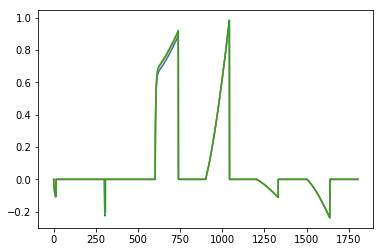

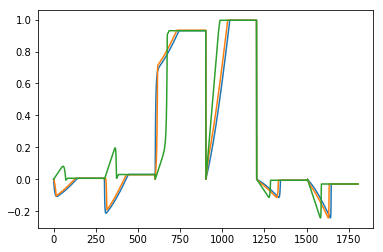

In [7]:
print(base_re_data.shape)
#plt.plot(base_data[0][0], label ='0')
#plt.plot(base_data[0][1], label ='1')
#plt.plot(base_data[0][2], label ='2')
plt.plot(base_re_data[0][3], label ='3')
plt.plot(base_re_data[0][4], label ='4')
plt.plot(base_re_data[0][5], label ='5')
plt.show()

plt.plot(base_data[0][5], label ='5')
plt.plot(base_data[17][5], label ='5')
plt.plot(base_data[100][5], label ='5')
plt.show()

In [9]:
def moving_avg_filter(x):
    x = x.flatten()
    N = 20
    length = len(x)
    # print(len(x))
    x = np.convolve(x, np.ones((N,))/N, mode='same')
    x[length -1] = x[length -2]
    # print(len(x))
    return x

def add_noise(sig, dV):
    noise = np.random.normal(0,dV,len(sig))
    for i in range(0, len(sig), 1):
        if sig[i] == 0:
            noise[i] = 0
    sig = sig + noise
    return sig

tau = 4400
def add_exp_decay(sig):
    for i in range(0, len(sig) ,1):
        sig[i] = sig[i] * np.exp(-i/tau)
    return sig

def baseline_correction(data):
    n_data = len(data)
    baseline_correction_value = np.mean(data[0:99])
    for i in range(0, n_data, 1):
        data[i] = data[i] - baseline_correction_value
    return data

def decay_correction(data, tau):
    decay_corrected = []
    decay_correction = []
    for i in range(1, len(data), 1):
        decay = np.sum(data[1:i-1])
        decay_correction.append(decay)
        decay_corrected.append(data[i] + decay / tau)
    decay_corrected.append(data[i-1])
    return decay_corrected

In [12]:
def MakeTestSignal(rawdata):
        dV = 5/200
        
        strip0 = rawdata[0:301] # strip 1
        strip1 = rawdata[301:602] # strip 2
        strip2 = rawdata[602:903] # strip 3
        strip3 = rawdata[903:1204]# strip 6
        strip4 = rawdata[1204:1505] # strip 7
        strip5 = rawdata[1505:1806] # strip 8
        
        strip0=strip0.flatten(order='C')
        strip1=strip1.flatten(order='C')
        strip2=strip2.flatten(order='C')
        strip3=strip3.flatten(order='C')
        strip4=strip4.flatten(order='C')
        strip5=strip5.flatten(order='C')
         
        strip0 = moving_avg_filter(strip0) 
        strip0 = moving_avg_filter(strip0)
        #strip0 = add_noise(strip0, dV)
        
        strip1 = moving_avg_filter(strip1)
        strip1 = moving_avg_filter(strip1)
        #strip1 = add_noise(strip1, dV)

        strip2 = moving_avg_filter(strip2)
        strip2 = moving_avg_filter(strip2)
        #strip2 = add_noise(strip2, dV)

        strip3 = moving_avg_filter(strip3)
        strip3 = moving_avg_filter(strip3)
       # strip3 = add_noise(strip3, dV)

        strip4 = moving_avg_filter(strip4)
        strip4 = moving_avg_filter(strip4)
        #strip4 = add_noise(strip4, dV)

        strip5 = moving_avg_filter(strip5)
        strip5 = moving_avg_filter(strip5)
        #strip5 = add_noise(strip5, dV)
        
        strip0 = add_noise(strip0, dV)
        strip1 = add_noise(strip1, dV)
        strip2 = add_noise(strip2, dV)
        strip3 = add_noise(strip3, dV)
        strip4 = add_noise(strip4, dV)
        strip5 = add_noise(strip5, dV)
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()

        return allstrips

def MakeTestRisingEdgeSignal(rawdata):
        dV = 5/200
        
        strip0 = rawdata[0:301] # strip 1
        strip1 = rawdata[301:602] # strip 2
        strip2 = rawdata[602:903] # strip 3
        strip3 = rawdata[903:1204]# strip 6
        strip4 = rawdata[1204:1505] # strip 7
        strip5 = rawdata[1505:1806] # strip 8
        
        strip0=strip0.flatten(order='C')
        strip1=strip1.flatten(order='C')
        strip2=strip2.flatten(order='C')
        strip3=strip3.flatten(order='C')
        strip4=strip4.flatten(order='C')
        strip5=strip5.flatten(order='C')
        
        strip0 = moving_avg_filter(strip0)
        strip0 = moving_avg_filter(strip0)
        #strip0 = add_noise(strip0, dV)
        
        strip1 = moving_avg_filter(strip1)
        strip1 = moving_avg_filter(strip1)
        #strip1 = add_noise(strip1, dV)

        strip2 = moving_avg_filter(strip2)
        strip2 = moving_avg_filter(strip2)
        #strip2 = add_noise(strip2, dV)

        strip3 = moving_avg_filter(strip3)
        strip3 = moving_avg_filter(strip3)
       # strip3 = add_noise(strip3, dV)

        strip4 = moving_avg_filter(strip4)
        strip4 = moving_avg_filter(strip4)
        #strip4 = add_noise(strip4, dV)

        strip5 = moving_avg_filter(strip5)
        strip5 = moving_avg_filter(strip5)
        #strip5 = add_noise(strip5, dV)
        
        strip0 = add_noise(strip0, dV)
        strip1 = add_noise(strip1, dV)
        strip2 = add_noise(strip2, dV)
        strip3 = add_noise(strip3, dV)
        strip4 = add_noise(strip4, dV)
        strip5 = add_noise(strip5, dV)
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        
        return allstrips


####

def MakeTestSignals():
    data = np.zeros((300, 12, 301 * 6)) #300 in z, 12 in x, 301 samples per signal, same as adl3 simulated data
    dV = 5/200 # the stdev of the noise in charge units -> 5kev * (1 [au] / 200 keV) = 5/200 [au]
    for i in range(0, 300*12, 1):
        i = int(i)
        filename = "./datafiles/Strip_SS_" + str(i) + ".txt"
        rawdata = np.genfromtxt(filename, skip_header=1)
        
        strip0 = rawdata[:,7:8] # strip 1
        strip1 = rawdata[:,8:9] # strip 2
        strip2 = rawdata[:,9:10] # strip 3
        strip3 = rawdata[:,12:13] # strip 6
        strip4 = rawdata[:,13:14] # strip 7
        strip5 = rawdata[:,14:15] # strip 8
        
        strip0=strip0.flatten(order='C')
        strip1=strip1.flatten(order='C')
        strip2=strip2.flatten(order='C')
        strip3=strip3.flatten(order='C')
        strip4=strip4.flatten(order='C')
        strip5=strip5.flatten(order='C')
         
        strip0 = moving_avg_filter(strip0) 
        strip0 = moving_avg_filter(strip0)
        #strip0 = add_noise(strip0, dV)
        
        strip1 = moving_avg_filter(strip1)
        strip1 = moving_avg_filter(strip1)
        #strip1 = add_noise(strip1, dV)

        strip2 = moving_avg_filter(strip2)
        strip2 = moving_avg_filter(strip2)
        #strip2 = add_noise(strip2, dV)

        strip3 = moving_avg_filter(strip3)
        strip3 = moving_avg_filter(strip3)
       # strip3 = add_noise(strip3, dV)

        strip4 = moving_avg_filter(strip4)
        strip4 = moving_avg_filter(strip4)
        #strip4 = add_noise(strip4, dV)

        strip5 = moving_avg_filter(strip5)
        strip5 = moving_avg_filter(strip5)
        #strip5 = add_noise(strip5, dV)
        
        strip0 = add_noise(strip0, dV)
        strip1 = add_noise(strip1, dV)
        strip2 = add_noise(strip2, dV)
        strip3 = add_noise(strip3, dV)
        strip4 = add_noise(strip4, dV)
        strip5 = add_noise(strip5, dV)
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        row = int(i / 12)
        col = int(i % 12)
        data[row, col] = allstrips # row, column
        #sleep(0.05)
        #data[i] = allstrips 
    return data

def MakeTestRisingEdgeSignals():
    data = np.zeros((300, 12, 301 * 6))
    dV = 5/200
    for i in range(0, 300 * 12, 1):
        i = int(i)
        filename = "./datafiles/Strip_SS_" + str(i) + ".txt"
        rawdata = np.genfromtxt(filename, skip_header=1)
        
        strip0 = rawdata[:,7:8] # strip 1 
        strip1 = rawdata[:,8:9] # strip 2
        strip2 = rawdata[:,9:10] # strip 3
        strip3 = rawdata[:,12:13] # strip 6
        strip4 = rawdata[:,13:14] # strip 7
        strip5 = rawdata[:,14:15] # strip 8
        
        strip0=strip0.flatten(order='C')
        strip1=strip1.flatten(order='C')
        strip2=strip2.flatten(order='C')
        strip3=strip3.flatten(order='C')
        strip4=strip4.flatten(order='C')
        strip5=strip5.flatten(order='C')
        
        strip0 = moving_avg_filter(strip0)
        strip0 = moving_avg_filter(strip0)
        #strip0 = add_noise(strip0, dV)
        
        strip1 = moving_avg_filter(strip1)
        strip1 = moving_avg_filter(strip1)
        #strip1 = add_noise(strip1, dV)

        strip2 = moving_avg_filter(strip2)
        strip2 = moving_avg_filter(strip2)
        #strip2 = add_noise(strip2, dV)

        strip3 = moving_avg_filter(strip3)
        strip3 = moving_avg_filter(strip3)
       # strip3 = add_noise(strip3, dV)

        strip4 = moving_avg_filter(strip4)
        strip4 = moving_avg_filter(strip4)
        #strip4 = add_noise(strip4, dV)

        strip5 = moving_avg_filter(strip5)
        strip5 = moving_avg_filter(strip5)
        #strip5 = add_noise(strip5, dV)
        
        strip0 = RisingEdge(strip0)
        strip1 = RisingEdge(strip1)
        strip2 = RisingEdge(strip2)
        strip3 = RisingEdge(strip3)
        strip4 = RisingEdge(strip4)
        strip5 = RisingEdge(strip5)
        
        strip0 = add_noise(strip0, dV)
        strip1 = add_noise(strip1, dV)
        strip2 = add_noise(strip2, dV)
        strip3 = add_noise(strip3, dV)
        strip4 = add_noise(strip4, dV)
        strip5 = add_noise(strip5, dV)
        
        allstrips = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        
        row = int(i / 12)
        col = int(i % 12)
        data[row, col] = allstrips # row, column
        #sleep(0.05)
        #data[i] = allstrips 
    return data

make test signals (base signals but with blurring and noise added)

In [13]:
test_data = MakeTestSignals()
test_re_data = MakeTestRisingEdgeSignals()

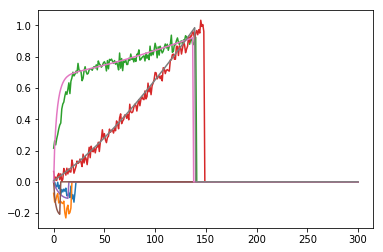

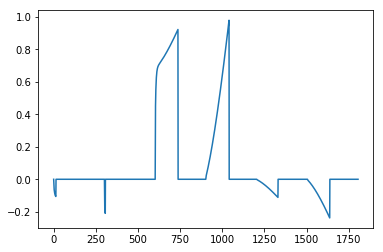

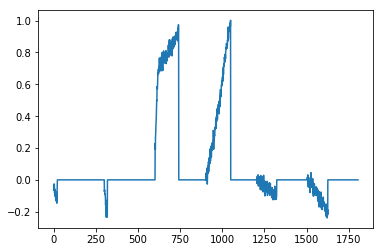

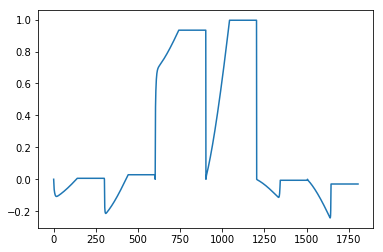

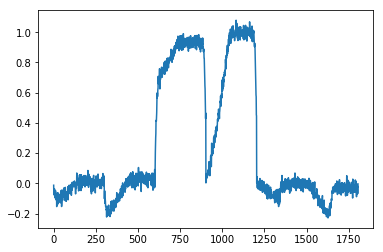

In [14]:
plt.plot(test_re_data[0][5][0:301]) # strip 0
plt.plot(test_re_data[0][5][301:602]) # strip 1
plt.plot(test_re_data[0][5][602:903]) # strip 2
plt.plot(test_re_data[0][5][903:1204]) # strip 3
plt.plot(base_re_data[0][5][0:301], '-')
plt.plot(base_re_data[0][5][301:602], '-')
plt.plot(base_re_data[0][5][602:903], '-')
plt.plot(base_re_data[0][5][903:1204], '-')
plt.show()
plt.plot(base_re_data[2][5], '-')
plt.show()
plt.plot(test_re_data[2][5])
plt.show()
plt.plot(base_data[2][5], '-')
plt.show()
plt.plot(test_data[2][5])
plt.show()
#plt.plot(base_data[2][0], '-')
#plt.plot(test_data[2][0])
#plt.show()

In [15]:
def calc_pos_res(Xi2): # FWHM
    d = 0.05 # in mm, distance btwn points simulated in ADL3
    interaction_energy = 200.0 # keV
    SNR = float(interaction_energy) / 5.0
    dx = ((2.354 * d / SNR)  * (1/np.sqrt(Xi2)))
    #dx = round(dx, 15)
    return dx

In [16]:
def Chi2Single(sig_ref, sig_raw, plot=True):
    sigma = 5/200
    # chi2_values = []
    # amp = np.amax(sig_raw)
    
    strip0_ref = sig_ref[0:301] #splitting apart signals to do shifting (currently excluded)
    strip1_ref = sig_ref[301:602]
    strip2_ref = sig_ref[602:903]
    strip3_ref = sig_ref[903:1204]
    strip4_ref = sig_ref[1204:1505]
    strip5_ref = sig_ref[1505:1806]
        
    strip0 = sig_raw[0:301]
    strip1 = sig_raw[301:602]
    strip2 = sig_raw[602:903]
    strip3 = sig_raw[903:1204]
    strip4 = sig_raw[1204:1505]
    strip5 = sig_raw[1505:1806]
        
   # strip0, chi2 = shift_signal(strip0_ref, strip0) # does time and amplitude
   # strip1, chi2 = shift_signal(strip1_ref, strip1)
   # strip2, chi2 = shift_signal(strip2_ref, strip2) 
   # strip3, chi2 = shift_signal(strip3_ref, strip3) 
   # strip4, chi2 = shift_signal(strip4_ref, strip4) 
   # strip5, chi2 = shift_signal(strip5_ref, strip5)
        
    sig = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        
    chi_squared = np.sum(((sig_ref-sig)/(np.sqrt(2) * sigma))**2)
    #chi_squared = np.round(chi_squared, 10)
        
    if plot == True:
            plt.figure(1)
            plt.plot(sig_ref, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
            plt.plot(sig_raw, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
            plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
            plt.text(0, 0.1, chi_squared) 
            plt.legend()
            plt.savefig('test1.pdf')
            plt.show()
            
    # print('chi2 ', chi2)
    posres = calc_pos_res(chi_squared)
    # print('posres ', posres)
    
    return posres, chi_squared 

In [17]:
def Chi2SingleTest(sig_ref, sig_raw, plot=True): # same as above function Chi2SignleTest, just used for testing diff things
    # chi2_values = []
    # amp = np.amax(sig_raw)
    # sig_raw = sig_raw / amp # normalize input signal
    
    strip0_ref = sig_ref[0:301]
    strip1_ref = sig_ref[301:602]
    strip2_ref = sig_ref[602:903]
    strip3_ref = sig_ref[903:1204]
    strip4_ref = sig_ref[1204:1505]
    strip5_ref = sig_ref[1505:1806]
        
    strip0 = sig_raw[0:301]
    strip1 = sig_raw[301:602]
    strip2 = sig_raw[602:903]
    strip3 = sig_raw[903:1204]
    strip4 = sig_raw[1204:1505]
    strip5 = sig_raw[1505:1806]
        
   # strip0, chi2 = shift_signal(strip0_ref, strip0) # does time and amplitude
   # strip1, chi2 = shift_signal(strip1_ref, strip1)
   # strip2, chi2 = shift_signal(strip2_ref, strip2)
   # strip3, chi2 = shift_signal(strip3_ref, strip3) 
   # strip4, chi2 = shift_signal(strip4_ref, strip4) 
   # strip5, chi2 = shift_signal(strip5_ref, strip5) 
        
    sig = np.concatenate((strip0, strip1, strip2, strip3, strip4, strip5)).flatten()
        
    #chi_squared = np.sum(((sig_ref-sig)/(np.sqrt(2) * sigma))**2)
    #chi_squared = np.round(chi_squared, 5)

    chi2 = 0
    for i in range(0, len(sig_ref),1):
        #print(sig[i]- ref_sig[i])
        dsig = (sig[i]- ref_sig[i])**2
        #print('d',dsig)
        sigma = float(5)/float(200)
        sigmasq = 2 * (sigma**2)
        #print('r', (float(dsig) / float(sigmasq)))
        chi2 = chi2 + (float(dsig) / float(sigmasq))
        #print('c', chi2)
    #chi2 = round(chi2, 20)
    #print('her')
    #print(chi2)
    SNR = 200/5
    posres = 2.354 * 0.05 * (1/SNR) * (1/(np.sqrt(chi2)))
    #posres = round(pos,15)
        
    if plot == True:
            plt.figure(1)
            plt.plot(sig_ref, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
            plt.plot(sig_raw, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
            plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
            plt.text(0, 0.1, chi2) 
            plt.legend()
            #plt.savefig('test1.pdf')
            plt.show()
            
    # print('chi2 ', chi2)
    #posres = calc_pos_res(chi_squared)
    # print('posres ', posres)
    
    return posres, chi2

test signal shifting (currently not implemented, ignore this)

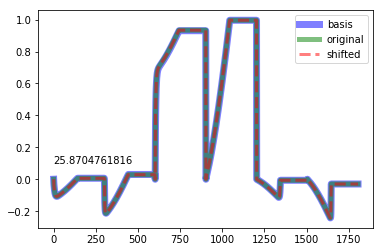

chi2:  25.8704761816
pos:  0.000578514515402


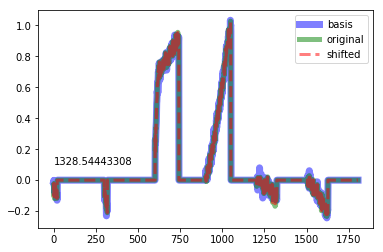

chi2:  1328.54443308
pos:  8.07287874751e-05


In [18]:
ref_sig = base_data[0, 5]
raw_sig = base_data[1, 5]
pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=True)
print('chi2: ',chi2)
print('pos: ', pos)

ref_sig = test_re_data[0, 5]
raw_sig = test_re_data[1, 5]
pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=True)
print('chi2: ',chi2)
print('pos: ', pos)


calc chi2 and position res for central strip (column 5 in data matrix)

In [19]:
chi_2_vals = []
z_pos_vals = [] 
z_chi_sq = []
ref_sig = base_data[149, 5]
for i in range(0, 299):
    raw_sig = base_data[i,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    chi_2_vals.append(chi2)
    z_pos_vals.append(pos)
    z_chi_sq.append(chi2)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


using full signals (not t99-t01), base signals only (no noise/ blurring)

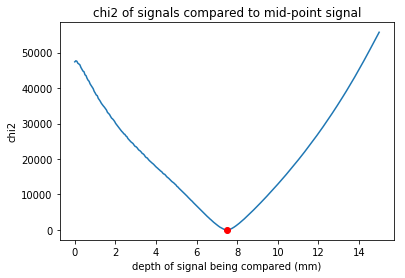

In [20]:
#print(z_chi_sq)
xvals = np.linspace(0, 15, 299)
plt.title('chi2 of signals compared to mid-point signal')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, z_chi_sq, '')
plt.plot(xvals[149],z_chi_sq[149], 'ro')
#plt.savefig('./chi2_full.png')
plt.show()

using full signal (not t99-t01), with noise, blurring

In [21]:
chi_2_vals = []
z_pos_vals = [] 
z_chi_sq = []
ref_sig = MakeTestSignal(base_data[149,5])
test_data[149, 5] = MakeTestSignal(base_data[149,5])
for i in range(0, 299):
    raw_sig = test_data[i,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    chi_2_vals.append(chi2)
    z_pos_vals.append(pos)
    z_chi_sq.append(chi2)

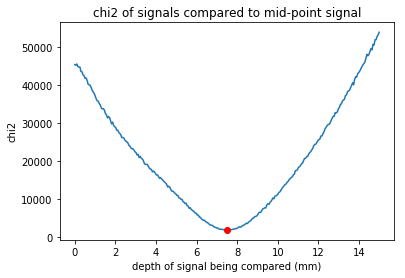

In [22]:
xvals = np.linspace(0, 15, 299)
plt.title('chi2 of signals compared to mid-point signal')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, z_chi_sq, '')
plt.plot(xvals[149],z_chi_sq[149], 'ro')
plt.savefig('./chi2_full.png')
plt.show()

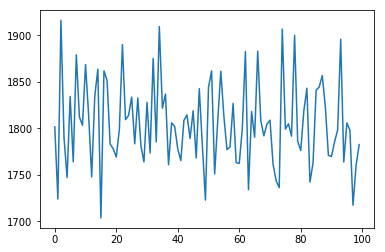

1805.01833072


In [23]:
chi_2_vals = []
z_pos_vals = [] 
z_chi_sq = []
ref_sig = test_data[149, 5]
for i in range(0, 100):
    raw_sig = MakeTestSignal(base_data[149,5])
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    chi_2_vals.append(chi2)
    z_pos_vals.append(pos)
    z_chi_sq.append(chi2)
plt.plot(z_chi_sq)
plt.show()
print(np.mean(z_chi_sq))

using (t99-t01), no noise/blurring

In [24]:
re_chi_2_vals = []
re_z_pos_vals = [] 
re_z_chi_sq = []
ref_sig = base_re_data[149, 5]
for i in range(0, 299):
    raw_sig = base_re_data[i,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    re_chi_2_vals.append(chi2)
    re_z_pos_vals.append(pos)
    re_z_chi_sq.append(chi2)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


299
299


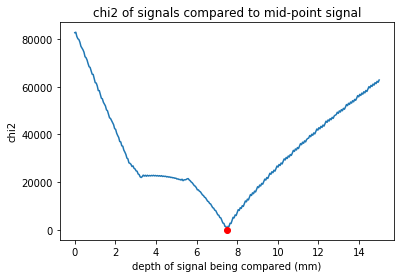

In [25]:
#print(z_chi_sq)
xvals = np.linspace(0, 15, 299)
print(len(xvals))
print(len(re_z_chi_sq))
plt.title('chi2 of signals compared to mid-point signal')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, re_z_chi_sq, '')
plt.plot(xvals[149],re_z_chi_sq[149], 'ro')
plt.savefig('./chi2.png')
plt.show()

using (t99-t01), with noise, blurring

In [26]:
re_chi_2_vals = []
re_z_pos_vals = [] 
re_z_chi_sq = []
ref_sig = test_re_data[149, 5]
for i in range(0, 299):
    raw_sig = test_re_data[i,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    re_chi_2_vals.append(chi2)
    re_z_pos_vals.append(pos)
    re_z_chi_sq.append(chi2)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


299
299


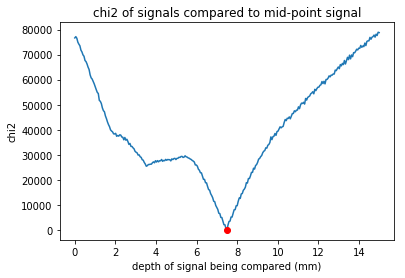

In [27]:
#print(z_chi_sq)
xvals = np.linspace(0, 15, 299)
print(len(xvals))
print(len(re_z_chi_sq))
plt.title('chi2 of signals compared to mid-point signal')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, re_z_chi_sq, '-')
plt.plot(xvals[149],re_z_chi_sq[149], 'ro')
plt.savefig('./chi2.png')
plt.show()

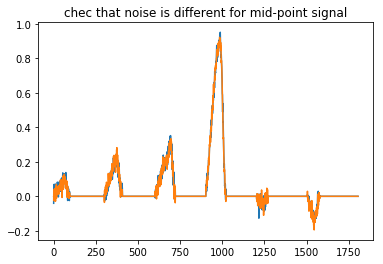

581.802255275


In [28]:
chi_2_vals = []
z_pos_vals = [] 
z_chi_sq = []
ref_sig = MakeTestSignal(base_re_data[149,5])
test_re_data[149, 5] = MakeTestSignal(base_re_data[149,5])
plt.title('chec that noise is different for mid-point signal')
plt.plot(ref_sig)
plt.plot(test_re_data[149, 5])
plt.show()
for i in range(0, 299):
    raw_sig = test_re_data[i,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    chi_2_vals.append(chi2)
    z_pos_vals.append(pos)
    z_chi_sq.append(chi2)
    
print(chi_2_vals[149])

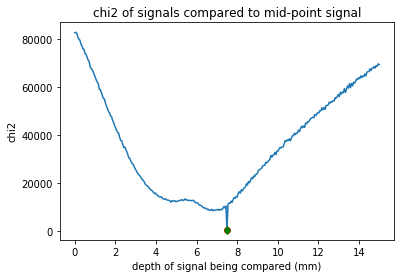

In [29]:
xvals = np.linspace(0, 15, 299)
plt.title('chi2 of signals compared to mid-point signal')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, z_chi_sq, '')
plt.plot(xvals[149],z_chi_sq[149], 'ro')
plt.plot(xvals[np.argmin(z_chi_sq)], z_chi_sq[np.argmin(z_chi_sq)], 'gd')
plt.savefig('./chi2_full.png')
plt.show()

299
299


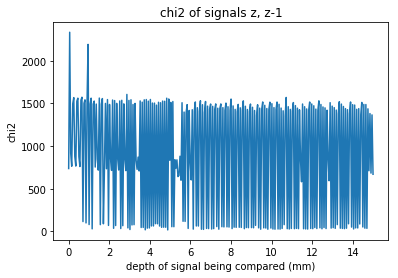

In [30]:
chi_2_vals = []
z_pos_vals = [] 
z_chi_sq = []
#print(pos_vals)
#for i in range(0, len(base_data)):
ref_sig = base_re_data[149, 5]
for i in range(0, 299):
    #print(i)
    ref_sig = base_re_data[i, 5]
    raw_sig = base_re_data[i + 1,5]
    pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
    #print(pos)
    #print(chi2)
    chi_2_vals.append(chi2)
    z_pos_vals.append(pos)
    z_chi_sq.append(chi2)
#print(np.mean(z_pos_vals))
#print()


#print(z_chi_sq)
xvals = np.linspace(0, 15, 299)
print(len(xvals))
print(len(z_chi_sq))
plt.title('chi2 of signals z, z-1')
plt.ylabel('chi2')
plt.xlabel('depth of signal being compared (mm)')
plt.plot(xvals, z_chi_sq, '')
#plt.plot(xvals[149],z_chi_sq[149], 'ro')
#plt.savefig('./chi2.png')
plt.show()

In [31]:
# Z and Z + 1
re_chi_2_vals = []
re_z_pos_vals = np.zeros((299, 12))
re_z_chi_sq = np.zeros((299, 12))
#print(pos_vals)
#for i in range(0, len(base_data)):
for j in range(0, 12):
    for i in range(0, 299 - 1):
        ref_sig = base_re_data[i, j]
        raw_sig = base_re_data[i + 1,j]
        pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
        re_chi_2_vals.append(chi2)
        re_z_pos_vals[i, j] = pos
        re_z_chi_sq[i, j] = chi2
print(np.mean(re_z_pos_vals))

# Z and Z + 1
chi_2_vals = []
z_pos_vals = np.zeros((299, 12))
z_chi_sq = np.zeros((299, 12))
#print(pos_vals)
#for i in range(0, len(base_data)):
for j in range(0, 12):
    for i in range(0, 299 - 1):
        ref_sig = base_data[i, j]
        raw_sig = base_data[i + 1,j]
        pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=False)
        chi_2_vals.append(chi2)
        z_pos_vals[i, j] = pos
        z_chi_sq[i, j] = chi2
print(np.mean(z_pos_vals))

0.000183533944624
0.000644253305791


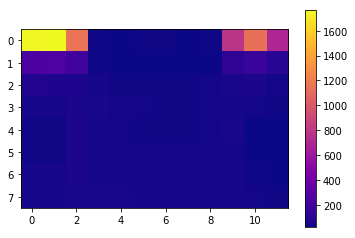

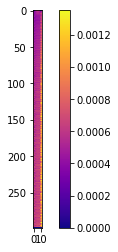

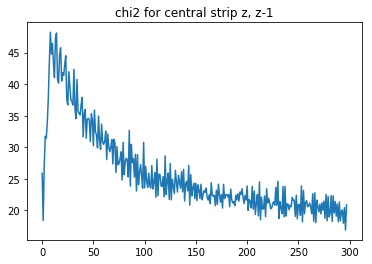

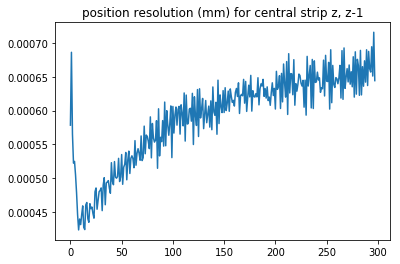

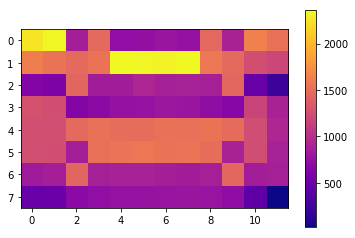

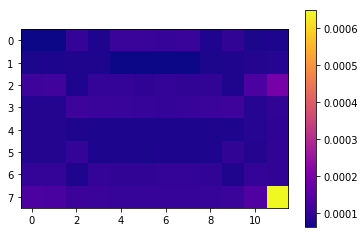

In [32]:
plt.imshow( z_chi_sq[0:8,], cmap='plasma', interpolation='none')
plt.colorbar()
#plt.savefig('./z_xi_png.pdf')
plt.show()

plt.imshow( z_pos_vals[0:300,], cmap='plasma', interpolation='none')
plt.colorbar()
#plt.savefig('./z_pos_png.pdf')
plt.show()

plt.title('chi2 for central strip z, z-1')
plt.plot(z_chi_sq[0:298,5])
plt.show()

plt.title('position resolution (mm) for central strip z, z-1')
plt.plot(z_pos_vals[0:298,5])
plt.show()

plt.imshow( re_z_chi_sq[0:8,], cmap='plasma', interpolation='none')
plt.colorbar()
#plt.savefig('./z_xi_png.pdf')
plt.show()

plt.imshow( re_z_pos_vals[0:8,], cmap='plasma', interpolation='none')
plt.colorbar()
#plt.savefig('./z_pos_png.pdf')
plt.show()

# PAST THIS POINT THERE ARE ONLY OLD FUNCTIONS 

In [ ]:
def FindSignal(sig_raw, plot=True):
    chi2_values = []
    # amp = np.amax(sig_raw)
    # sig_raw = sig_raw / amp # normalize input signal
    
    for i in range(0, len(base_data), 1): # i  event number, j = strip number, 
        sig_ref = base_data[i, 0:]

        strip0_ref = sig_ref[0:301]
        strip1_ref = sig_ref[301:602]
        strip2_ref = sig_ref[602:903]
        strip3_ref = sig_ref[903:1204]
        
        strip0 = sig_raw[0:301]
        strip1 = sig_raw[301:602]
        strip2 = sig_raw[602:903]
        strip3 = sig_raw[903:1204]
        
        strip0, chi2 = shift_signal(strip0_ref, strip0) # does time and amplitude
        strip1, chi2 = shift_signal(strip1_ref, strip1) # does time and amplitude
        strip2, chi2 = shift_signal(strip2_ref, strip2) # does time and amplitude
        strip3, chi2 = shift_signal(strip3_ref, strip3) # does time and amplitude
        
        sig = np.concatenate((strip0, strip1, strip2, strip3)).flatten()
        
        chi_squared = np.sum(((sig_ref-sig)/xerror)**2)
        chi_squared = np.round(chi_squared, 5)
        
        chi2_values.append(chi2)
        
        if plot == True:
            print(chi2)
            plt.figure(1)
            plt.plot(sig_ref, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
            plt.plot(sig_raw, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
            plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
            plt.text(0, 0.1, chi2) 
            plt.legend()
            plt.savefig('test1.pdf')
            plt.show()
        
    i = np.argmin(chi2_values)
    
    print('index ', i)
    
    sig_ref = base_data[i, 0:]
    
    strip0_ref = sig_ref[0:301]
    strip1_ref = sig_ref[301:602]
    strip2_ref = sig_ref[602:903]
    strip3_ref = sig_ref[903:1204]
        
    strip0 = sig_raw[0:301]
    strip1 = sig_raw[301:602]
    strip2 = sig_raw[602:903]
    strip3 = sig_raw[903:1204]
        
    strip0, chi2 = shift_signal(strip0_ref, strip0) # does time and amplitude
    strip1, chi2 = shift_signal(strip1_ref, strip1) # does time and amplitude
    strip2, chi2 = shift_signal(strip2_ref, strip2) # does time and amplitude
    strip3, chi2 = shift_signal(strip3_ref, strip3) # does time and amplitude
        
    sig = np.concatenate((strip0, strip1, strip2, strip3)).flatten()
        
    chi_squared = np.sum(((sig_ref-sig)/(np.sqrt(2) * sigma))**2)
    chi_squared = np.round(chi_squared, 5)
    
    if plot == True:
        plt.figure(1)
        plt.cla()
        plt.clf()
        plt.plot(sig_ref, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
        plt.plot(sig_raw, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        plt.text(0, 0.1, chi2) 
        plt.legend()
        plt.savefig('test1.pdf')
        plt.show()
        
    return i, chi2

In [ ]:
def DownsampleData(data, sampling_interval):
    downsampled_data = data[0::sampling_interval]
    return downsampled_data


In [ ]:
def shift_signal(sig0, sig1):
    # sig0 = ref signal
    # sig1 = one being compared
    #0.1 * np.amax(sig1) #TODO
    chisq_list = []
    sig = sig1
    #print(sig)
    chi_squared = np.sum(((sig-sig0)/sigma)**2)
    chisq_list.append(chi_squared)
    sigout = sig1
    chisq = chi_squared
    for amp in [0]: # TODO
        #sig0 = sig0 * amp
        #amp = np.amax(sig1)
        for i in range(1, int(len(sig1) / 4), 1):  # shift to larger times
            sig = list(np.linspace(0, sig1[0], i))
            sig.extend(sig1[0:-(i)])
            chi_squared = round(np.sum(((sig-sig0)/sigma)**2),5)
            chisq_list.append(chi_squared)
            if chi_squared < chisq:
                sigout = sig
                chisq = chi_squared
                #print(amp)
                #print('chi squared ', chi_squared)
        #plt.figure(60)
        #plt.title('improved with right shift')
        #plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5,label='base')
        #plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        #plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        #plt.legend()
        #plt.show()
        for i in range(1, int(len(sig1) / 4), 1):  # shift to smaller times
            sig = list(sig1[(i):])
            sig.extend([float(sig1[-1])] * (i))
            chi_squared = np.sum(((sig-sig0)/sigma)**2)
            chisq_list.append(chi_squared)
            #print(' chi_sq ', chi_squared)
            if chi_squared == min(chisq_list):
                #print('hhbba')
                #print(i)
                #print(sigout)
                sigout = sig
                chisq = chi_squared
        #plt.title('improved with left shift')
        #plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
        #plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        #plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        #plt.legend()
        #plt.show()
    ##plt.figure(60)
    ##plt.title('final')
    ##plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
    ##plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
    ##plt.plot(sigout, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
    ##plt.legend()
    ##plt.show()
    return sigout, chisq
         #chisq_list = []
    #print('final chi_sq ', chisq)
#    plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
 #   plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
  #  plt.plot(sigout, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
   # plt.legend()
   # plt.show()
   # return sigout, chisq

In [ ]:
def PlotSignalGrid(data, event_num=0, interactions_per_event=[4,5,1]):
    signal0 = [0] * 301
    signal1 = [0] * 301
    signal2 = [0] * 301
    signal3 = [0] * 301
    signal4 = [0] * 301
    signal5 = [0] * 301
    n = 301  # in ns the time of the pulse
    interactions_already_counted = 0
    for l in range(event_num, event_num + 1, 1):
        startindex = 0
        print('start index ', startindex)
        interactions = interactions_per_event[l]
        # print('interactions ', interactions)
        if l == 0:
            interactions_already_counted = 0
        else:
            interactions_already_counted = int(np.sum(interactions_per_event[0:l]))
        # print('interactions_already_counted ', interactions_already_counted)
        for i in range(interactions_already_counted, number_interactions_total, 1):
            if i < interactions_already_counted + interactions:
                for j in range(0, number_samples, 1):
                    #if j == 10:
                        #print('j + startindex ', j + startindex)
                        #print('signal0 ', signal0[j + startindex])
                    signal0[j + startindex] = signal0[j + startindex] + data[i][0][j] # i = event_number, k=strip, j = number_sample
                    signal1[j + startindex] = signal1[j + startindex] + data[i][1][j]
                    signal2[j + startindex] = signal2[j + startindex] + data[i][2][j]
                    signal3[j + startindex] = signal3[j + startindex] + data[i][3][j]
                    signal4[j + startindex] = signal4[j + startindex] + data[i][4][j]
                    signal5[j + startindex] = signal5[j + startindex] + data[i][5][j]

    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0, 0].set_title('strip 0')
    axes[0, 1].set_title('strip 1')
    axes[0, 2].set_title('strip 2')
    axes[1, 0].set_title('strip 3')
    axes[1, 1].set_title('strip 4')
    axes[1, 2].set_title('strip 5')

    axes[0, 0].set_ylim(ymin=-1)
    axes[0, 1].set_ylim(ymin=-1)
    axes[0, 2].set_ylim(ymin=-1)
    axes[1, 0].set_ylim(ymin=-1)
    axes[1, 1].set_ylim(ymin=-1)
    axes[1, 2].set_ylim(ymin=-1)
    axes[0, 0].set_ylim(ymax=1)
    axes[0, 1].set_ylim(ymax=1)
    axes[0, 2].set_ylim(ymax=1)
    axes[1, 0].set_ylim(ymax=1)
    axes[1, 1].set_ylim(ymax=1)
    axes[1, 2].set_ylim(ymax=1)

    axes[0, 0].plot(signal0)
    axes[0, 1].plot(signal1)
    axes[0, 2].plot(signal2)
    axes[1, 0].plot(signal3)
    axes[1, 1].plot(signal4)
    axes[1, 2].plot(signal5)
    fig.tight_layout()
    plt.show()

In [ ]:
def PlotSignalGridSim(data, event_num = 0):

    signal0 = data[event_num][0][0:301] #i = event_number, k=strip, j = number_sample
    signal1 = data[event_num][1][0:301]
    signal2 = data[event_num][2][0:301]
    signal3 = data[event_num][3][0:301]
    signal4 = data[event_num][4][0:301]
    signal5 = data[event_num][5][0:301]

    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0, 0].set_title('strip 0')
    axes[0, 1].set_title('strip 1')
    axes[0, 2].set_title('strip 2')
    axes[1, 0].set_title('strip 3')
    axes[1, 1].set_title('strip 4')
    axes[1, 2].set_title('strip 5')

    axes[0, 0].set_ylim(ymin=-1)
    axes[0, 1].set_ylim(ymin=-1)
    axes[0, 2].set_ylim(ymin=-1)
    axes[1, 0].set_ylim(ymin=-1)
    axes[1, 1].set_ylim(ymin=-1)
    axes[1, 2].set_ylim(ymin=-1)
    axes[0, 0].set_ylim(ymax=1)
    axes[0, 1].set_ylim(ymax=1)
    axes[0, 2].set_ylim(ymax=1)
    axes[1, 0].set_ylim(ymax=1)
    axes[1, 1].set_ylim(ymax=1)
    axes[1, 2].set_ylim(ymax=1)

    axes[0, 0].plot(signal0)
    axes[0, 1].plot(signal1)
    axes[0, 2].plot(signal2)
    axes[1, 0].plot(signal3)
    axes[1, 1].plot(signal4)
    axes[1, 2].plot(signal5)
    fig.tight_layout()
    plt.show()

In [ ]:
ref_sig = test_re_data[0, 0]
raw_sig = test_re_data[1, 0]
chi2 = 0
for i in range(0, len(raw_sig),1):
    chi2 += 0.5 *( ((raw_sig[i] - ref_sig[i]) / (5/200))**2)
pos = 2.354 * 0.05 * (5/200) * (1/(np.sqrt(chi2)))
pos = round(pos,14)
print('g')
print(chi2)
print(pos)

ref_sig = test_re_data[0, 0]
raw_sig = test_re_data[0, 0]
pos, chi2 = Chi2Single(ref_sig, raw_sig, plot=True)
print('chi2: ',chi2)
print('pos: ', pos)

ref_sig = test_re_data[0, 0]
raw_sig = test_re_data[1, 0]
pos, chi2 = Chi2SingleTest(ref_sig, raw_sig, plot=True)
print('chi2: ',chi2)
print('pos: ', pos)

In [ ]:
def test_shifter():
    signal0 = data[event_num][0][0:301]
    shift_signal(signal0, signal0)
    signal0_edited = list(np.linspace(0, signal1[0], 10))
    signal0_edited.extend(signal0[0:-10])
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(np.linspace(0, signal1[0], 50))
    signal0_edited.extend(signal0[0:-50])
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(signal0[(10):])
    signal0_edited.extend([float(signal0[-1])] * (10))
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(signal0[(50):])
    signal0_edited.extend([float(signal0[-1])] * (50))
    shift_signal(signal0, signal0_edited)

def shift_left(signal0, i):
    signal0_edited = list(np.linspace(0, signal0[0], i))
    signal0_edited.extend(signal0[0:-i])
    return signal0_edited

def shift_right(signal0, i):
    signal0_edited = list(signal0[(i):])
    signal0_edited.extend([float(signal0[-1])] * (i))
    shift_signal(signal0, signal0_edited)
    return signal0_edited